In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy import stats
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import RandomOverSampler, SMOTE

In [2]:
df = pd.read_csv('Churn_Predictions.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df2 = df.drop(['RowNumber','CustomerId' ,'Surname'],axis=1, inplace=True)

In [4]:
df2 = pd.get_dummies(df, columns = {'Gender', 'Geography'})

In [5]:
X = df2.drop(['Exited'], axis=1)
y = df2['Exited']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [6]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9254,686,32,6,0.00,2,1,1,179093.26,1,0,0,0,1
1561,632,42,4,119624.60,2,1,1,195978.86,0,1,0,0,1
1670,559,24,3,114739.92,1,1,0,85891.02,0,0,1,0,1
6087,561,27,9,135637.00,1,1,0,153080.40,1,0,0,1,0
6669,517,56,9,142147.32,1,0,0,39488.04,1,0,0,0,1


In [7]:
y_train.value_counts(normalize=True)

0    0.7945
1    0.2055
Name: Exited, dtype: float64

### 1. Decision Tree

In [8]:
dtc = DecisionTreeClassifier(random_state=42)

In [9]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
dtc_pred = dtc.predict(X_test)
dtc_proba = dtc.predict_proba(X_test)

In [11]:
dtc_pred

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [12]:
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.45      0.51      0.48       393

    accuracy                           0.78      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.79      0.78      0.78      2000



In [13]:
tndtc, fpdtc, fndtc, tpdtc = confusion_matrix(y_test, dtc_pred).ravel()
print(confusion_matrix(y_test, dtc_pred))

[[1358  249]
 [ 193  200]]


### 2. Random Forest

In [14]:
rfc = RandomForestClassifier(random_state=42)

In [15]:
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [16]:
rfc_pred = rfc.predict(X_test)
rfc_proba = rfc.predict_proba(X_test)

In [17]:
rfc_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [18]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000



In [19]:
tnrfc, fprfc, fnrfc, tprfc = confusion_matrix(y_test, rfc_pred).ravel()
print(confusion_matrix(y_test, rfc_pred))

[[1546   61]
 [ 209  184]]


### 3. Adaboost

In [20]:
abc = AdaBoostClassifier(random_state=42)

In [21]:
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=42)

In [22]:
abc_pred = abc.predict(X_test)
abc_proba = abc.predict_proba(X_test)

In [23]:
abc_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [24]:
print(classification_report(y_test, abc_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.70      0.49      0.57       393

    accuracy                           0.86      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [25]:
tnabc, fpabc, fnabc, tpabc = confusion_matrix(y_test, abc_pred).ravel()
print(confusion_matrix(y_test, abc_pred))

[[1523   84]
 [ 201  192]]


### 4. Gradient Boost

In [26]:
gbc = GradientBoostingClassifier(random_state=42)

In [27]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [28]:
gbc_pred = gbc.predict(X_test)
gbc_proba = gbc.predict_proba(X_test)

In [29]:
gbc_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [30]:
print(classification_report(y_test, gbc_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [31]:
tngbc, fpgbc, fngbc, tpgbc = confusion_matrix(y_test, gbc_pred).ravel()
print(confusion_matrix(y_test, gbc_pred))

[[1542   65]
 [ 207  186]]


## Machine Learning With Hyperparameter
### 1. Decision Tree with Hyperparameter

In [32]:
dtc_hyper = DecisionTreeClassifier(random_state=42)

In [33]:
dtc_hyper.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
# Best Decision Tree Hyperparameter Tuning
param_random_dtc = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10,15,20],
    'min_samples_split': [2,5,10],
    'max_features' : ['auto', 'sqrt', 'None'],
    'random_state' :[42]
}
random_search_dtc = RandomizedSearchCV(estimator=dtc_hyper, param_distributions=param_random_dtc, scoring='roc_auc', cv=5, n_jobs=-1)
random_search_dtc.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 15, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'None'],
                                        'min_samples_split': [2, 5, 10],
                                        'random_state': [42]},
                   scoring='roc_auc')

In [35]:
random_search_dtc.best_params_

{'random_state': 42,
 'min_samples_split': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'gini'}

In [36]:
dtc_random = random_search_dtc.best_estimator_

In [37]:
dtc_random_pred = dtc_random.predict(X_test)
dtc_random_proba = dtc_random.predict_proba(X_test)

In [38]:
dtc_random_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [39]:
print(classification_report(y_test, dtc_random_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1607
           1       0.61      0.45      0.52       393

    accuracy                           0.84      2000
   macro avg       0.74      0.69      0.71      2000
weighted avg       0.82      0.84      0.83      2000



In [40]:
tndtc_hyper, fpdtc_hyper, fndtc_hyper, tpdtc_hyper = confusion_matrix(y_test, dtc_random_pred).ravel()
print(confusion_matrix(y_test, dtc_random_pred))

[[1494  113]
 [ 216  177]]


### 2. Random Forest With Hyperparameter

In [41]:
rfc_hyper = RandomForestClassifier(random_state=42)

In [42]:
rfc_hyper.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
param_random_rfc = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10,15,20],
    'min_samples_split': [2,5,10],
    'n_estimators': [100,200],
    'random_state': [42]
}
random_search_rfc = RandomizedSearchCV(estimator=rfc_hyper, param_distributions=param_random_dtc, scoring='roc_auc', cv=5, n_jobs=-1)
random_search_rfc.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 15, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'None'],
                                        'min_samples_split': [2, 5, 10],
                                        'random_state': [42]},
                   scoring='roc_auc')

In [44]:
random_search_rfc.best_params_

{'random_state': 42,
 'min_samples_split': 10,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'entropy'}

In [45]:
random_search = random_search_rfc.best_estimator_

In [46]:
rfc_random_pred = rfc.predict(X_test)
rfc_randomd_proba = rfc.predict_proba(X_test)

In [47]:
print(classification_report(y_test, rfc_random_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000



In [48]:
tnrfc_hyper, fprfc_hyper, fnrfc_hyper, tprfc_hyper = confusion_matrix(y_test, rfc_random_pred).ravel()
print(confusion_matrix(y_test, rfc_random_pred))

[[1546   61]
 [ 209  184]]


### 3. Adaboost With Hyperparameter

In [49]:
abc_hyper = AdaBoostClassifier(random_state=42)

In [50]:
abc_hyper.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [51]:
param_random_abc = {
    'n_estimators': [50, 100,200],
    'learning_rate': [0.5, 1.0, 2.0],
}
random_search_abc = RandomizedSearchCV(estimator=abc_hyper, param_distributions=param_random_abc, scoring='roc_auc', cv=5, n_jobs=-1)
random_search_abc.fit(X_train, y_train)

C:\Users\gemilang\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.5, 1.0, 2.0],
                                        'n_estimators': [50, 100, 200]},
                   scoring='roc_auc')

In [52]:
random_search_abc.best_params_

{'n_estimators': 50, 'learning_rate': 0.5}

In [53]:
abc_random = random_search_abc.best_estimator_

In [54]:
abc_random_pred = abc_random.predict(X_test)
abc_random_proba = abc_random.predict_proba(X_test)

In [55]:
print(classification_report(y_test, abc_random_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1607
           1       0.72      0.48      0.57       393

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [56]:
tnabc_hyper, fpabc_hyper, fnabc_hyper, tpabc_hyper = confusion_matrix(y_test, abc_random_pred).ravel()
print(confusion_matrix(y_test, abc_random_pred))

[[1534   73]
 [ 205  188]]


### 4. Gradient Boost with Hyperparameter

In [57]:
gbc_hyper = GradientBoostingClassifier(random_state=42)

In [58]:
gbc_hyper.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [59]:
param_random_gbc = {
    'learning_rate': [0.1,0.5],
    'max_depth' : [3, 10],
    'min_samples_split' : [2,5],
    'n_estimators' : [100,200],
}
random_search_gbc = RandomizedSearchCV(estimator=gbc_hyper, param_distributions=param_random_gbc, scoring='roc_auc', n_jobs=-1)
random_search_gbc.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.5],
                                        'max_depth': [3, 10],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]},
                   scoring='roc_auc')

In [60]:
random_search_gbc.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'max_depth': 3,
 'learning_rate': 0.1}

In [61]:
gbc_random = random_search_gbc.best_estimator_

In [62]:
gbc_random_pred = gbc_random.predict(X_test)
gbc_random_proba = gbc_random.predict_proba(X_test)

In [63]:
print(classification_report(y_test, gbc_random_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [64]:
tngbc_hyper, fpgbc_hyper, fngbc_hyper, tpgbc_hyper = confusion_matrix(y_test, gbc_random_pred).ravel()
print(confusion_matrix(y_test, gbc_random_pred))

[[1542   65]
 [ 207  186]]


In [65]:
model_com = pd.DataFrame({
    "Decision Tree": [accuracy_score(y_test, dtc_pred),precision_score(y_test, dtc_pred, pos_label=0),recall_score(y_test, dtc_pred),f1_score(y_test, dtc_pred)],
    "Random Forest": [accuracy_score(y_test, rfc_pred),precision_score(y_test, rfc_pred, pos_label=0),recall_score(y_test, rfc_pred),f1_score(y_test, rfc_pred)],
    "Adaboost": [accuracy_score(y_test, abc_pred),precision_score(y_test, abc_pred, pos_label=0),recall_score(y_test, abc_pred),f1_score(y_test, abc_pred)],
    "Gradient": [accuracy_score(y_test, gbc_pred),precision_score(y_test, gbc_pred, pos_label=0),recall_score(y_test, gbc_pred),f1_score(y_test, gbc_pred)],
    "Decision.T Hyper": [accuracy_score(y_test, dtc_random_pred),precision_score(y_test, dtc_random_pred, pos_label=0),recall_score(y_test, dtc_random_pred),f1_score(y_test, dtc_random_pred)],
    "Random.F Hyper": [accuracy_score(y_test, rfc_random_pred),precision_score(y_test, rfc_random_pred, pos_label=0),recall_score(y_test, rfc_random_pred),f1_score(y_test, rfc_random_pred)],
    "Adabooost Hyper": [accuracy_score(y_test, abc_random_pred),precision_score(y_test, abc_random_pred, pos_label=0),recall_score(y_test, abc_random_pred),f1_score(y_test, abc_random_pred)],
    "Gradient Hyper": [accuracy_score(y_test, gbc_random_pred),precision_score(y_test, gbc_random_pred, pos_label=0),recall_score(y_test, gbc_random_pred),f1_score(y_test, gbc_random_pred)],
}, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score'])
model_com

,Decision Tree,Random Forest,Adaboost,Gradient,Decision.T Hyper,Random.F Hyper,Adabooost Hyper,Gradient Hyper
Accuracy Score,0.779000,0.865000,0.857500,0.864000,0.835500,0.865000,0.861000,0.864000
Precision Score,0.875564,0.880912,0.883411,0.881647,0.873684,0.880912,0.882116,0.881647
Recall Score,0.508906,0.468193,0.488550,0.473282,0.450382,0.468193,0.478372,0.473282
F1 Score,0.475059,0.576803,0.573991,0.577640,0.518302,0.576803,0.574924,0.577640


dari data di atas bahwa `Adaboost` dan `Decision Tree` tanpa hyperparameter lah yang terbaik, karena `Adaboost` dan `Decision Tree` tanpa hyperparameter memiliki ***recall*** yang baik dan ***precision*** yang baik dan ***F1 Score*** yang baik juga.
mengapa saya memilih recall dan precision di banding ***accuracy***, hal itu di karenakan ketidak balancean data. yaitu lebih banyaknya yang tidak exit dibandingkan dengan exit.

### Random Over Sampler Adaboost

In [66]:
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
y_ros.value_counts(normalize=True)

1    0.5
0    0.5
Name: Exited, dtype: float64

In [121]:
abc_ros = abc
abc_ros.fit(X_ros, y_ros)
abc_ros_pred = abc_ros.predict(X_test)
abc_ros_pred_proba = abc_ros.predict_proba(X_test)

In [68]:
# with oversampling
tnabc_ros, fpabc_ros, fnabc_ros, tpabc_ros = confusion_matrix(y_test, abc_ros_pred).ravel()
print(confusion_matrix(y_test, abc_ros_pred))

[[1260  347]
 [  81  312]]


In [69]:
tnabc, fpabc, fnabc, tpabc = confusion_matrix(y_test, abc_pred).ravel()
print(confusion_matrix(y_test, abc_pred))

[[1523   84]
 [ 201  192]]


In [70]:
# with oversampling
print(classification_report(y_test, abc_ros_pred))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      1607
           1       0.47      0.79      0.59       393

    accuracy                           0.79      2000
   macro avg       0.71      0.79      0.72      2000
weighted avg       0.85      0.79      0.80      2000



In [71]:
print(classification_report(y_test, abc_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.70      0.49      0.57       393

    accuracy                           0.86      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.85      0.86      0.85      2000



### SMOTE Adaboost

In [72]:
smote = SMOTE(random_state=42)
X_smo, y_smo = smote.fit_resample(X_train, y_train)
y_smo.value_counts(normalize=True)

1    0.5
0    0.5
Name: Exited, dtype: float64

In [73]:
abc_smo = abc
abc_smo.fit(X_smo, y_smo)
abc_smo_pred = abc_smo.predict(X_test)
abc_smo_pred_proba = abc_smo.predict_proba(X_test)

In [74]:
# with smote
tnabc_smo, fpabc_smo, fnabc_smo, tpabc_smo = confusion_matrix(y_test, abc_smo_pred).ravel()
print(confusion_matrix(y_test, abc_smo_pred))

[[1433  174]
 [ 143  250]]


In [75]:
tnabc, fpabc, fnabc, tpabc = confusion_matrix(y_test, abc_pred).ravel()
print(confusion_matrix(y_test, abc_pred))

[[1523   84]
 [ 201  192]]


In [76]:
# with SMOTE
print(classification_report(y_test, abc_smo_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1607
           1       0.59      0.64      0.61       393

    accuracy                           0.84      2000
   macro avg       0.75      0.76      0.76      2000
weighted avg       0.85      0.84      0.84      2000



In [77]:
print(classification_report(y_test, abc_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.70      0.49      0.57       393

    accuracy                           0.86      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.85      0.86      0.85      2000



## Random Over Sampler Decision Tree

In [78]:
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
y_ros.value_counts(normalize=True)

1    0.5
0    0.5
Name: Exited, dtype: float64

In [120]:
dtc_ros = dtc
dtc_ros.fit(X_ros, y_ros)
dtc_ros_pred = dtc_ros.predict(X_test)
dtc_ros_pred_proba = dtc_ros.predict_proba(X_test)

In [80]:
# with oversampling
tndtc_ros, fpdtc_ros, fndtc_ros, tpdtc_ros = confusion_matrix(y_test, dtc_ros_pred).ravel()
print(confusion_matrix(y_test, dtc_ros_pred))

[[1398  209]
 [ 199  194]]


In [81]:
tndtc, fpdtc, fndtc, tpdtc = confusion_matrix(y_test, dtc_pred).ravel()
print(confusion_matrix(y_test, dtc_pred))

[[1358  249]
 [ 193  200]]


In [82]:
# with oversampling
print(classification_report(y_test, dtc_ros_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1607
           1       0.48      0.49      0.49       393

    accuracy                           0.80      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.80      0.80      0.80      2000



In [83]:
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.45      0.51      0.48       393

    accuracy                           0.78      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.79      0.78      0.78      2000



## SMOTE Decision Tree

In [84]:
smote = SMOTE(random_state=42)
X_smo, y_smo = smote.fit_resample(X_train, y_train)
y_smo.value_counts(normalize=True)

1    0.5
0    0.5
Name: Exited, dtype: float64

In [85]:
dtc_smo = dtc
dtc_smo.fit(X_smo, y_smo)
dtc_smo_pred = dtc_smo.predict(X_test)
dtc_smo_pred_proba = dtc_smo.predict_proba(X_test)

In [86]:
# with smote
tndtc_smo, fpdtc_smo, fndtc_smo, tpdtc_smo = confusion_matrix(y_test, dtc_smo_pred).ravel()
print(confusion_matrix(y_test, dtc_smo_pred))

[[1330  277]
 [ 182  211]]


In [87]:
tndtc, fpdtc, fndtc, tpdtc = confusion_matrix(y_test, dtc_pred).ravel()
print(confusion_matrix(y_test, dtc_pred))

[[1358  249]
 [ 193  200]]


In [88]:
# with SMOTE
print(classification_report(y_test, dtc_smo_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1607
           1       0.43      0.54      0.48       393

    accuracy                           0.77      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.79      0.77      0.78      2000



In [89]:
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.45      0.51      0.48       393

    accuracy                           0.78      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.79      0.78      0.78      2000



In [90]:
model_com = pd.DataFrame({
    "Adaboost": [accuracy_score(y_test, abc_pred),precision_score(y_test, abc_pred, pos_label=0),recall_score(y_test, abc_pred),f1_score(y_test, abc_pred)],
    "Adaboost ROS": [accuracy_score(y_test, abc_ros_pred),precision_score(y_test, abc_ros_pred, pos_label=0),recall_score(y_test, abc_ros_pred),f1_score(y_test, abc_ros_pred)],
    "Adaboost SMO": [accuracy_score(y_test, abc_smo_pred),precision_score(y_test, abc_smo_pred, pos_label=0),recall_score(y_test, abc_smo_pred),f1_score(y_test, abc_smo_pred)],
    "Decision Tree": [accuracy_score(y_test, dtc_pred),precision_score(y_test, dtc_pred, pos_label=0),recall_score(y_test, dtc_pred),f1_score(y_test, dtc_pred)],
    "Decision Tree ROS": [accuracy_score(y_test, dtc_ros_pred),precision_score(y_test, dtc_ros_pred, pos_label=0),recall_score(y_test, dtc_ros_pred),f1_score(y_test, dtc_ros_pred)],
    "Decision Tree SMO": [accuracy_score(y_test, dtc_smo_pred),precision_score(y_test, dtc_smo_pred, pos_label=0),recall_score(y_test, dtc_smo_pred),f1_score(y_test, dtc_smo_pred)]
}, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score'])
model_com

,Adaboost,Adaboost ROS,Adaboost SMO,Decision Tree,Decision Tree ROS,Decision Tree SMO
Accuracy Score,0.857500,0.786000,0.841500,0.779000,0.796000,0.770500
Precision Score,0.883411,0.939597,0.909264,0.875564,0.875391,0.879630
Recall Score,0.488550,0.793893,0.636132,0.508906,0.493639,0.536896
F1 Score,0.573991,0.593156,0.611995,0.475059,0.487437,0.479001


Dari data di atas bahwa `Adaboost dengan OverSample` memiliki nilai ***Precision Score*** dan ***Adaboost Score*** lebih tinggi di bandingkan dengan yang lainnya. 

## ROC AUC

In [102]:
adbprob1 = abc_ros_pred_proba[:, 1]
fpr_abc_ros, tpr_abc_ros, threshold_abc_ros = roc_curve(y_test, adbprob1)
auc_abc = auc(fpr_abc_ros, tpr_abc_ros)

In [103]:
dtcprob1 = dtc_smo_pred_proba[:, 1]
fpr_dtc_smo, tpr_dtc_smo, threshold_dtc_smo = roc_curve(y_test, dtcprob1)
auc_dtc = auc(fpr_dtc_smo, tpr_dtc_smo)

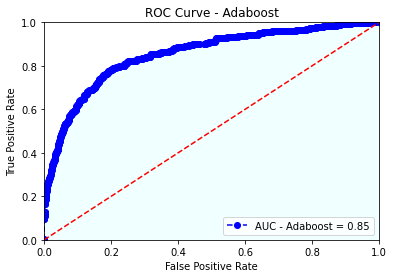

In [104]:
plt.title('ROC Curve - Adaboost')
plt.plot(fpr_abc_ros, tpr_abc_ros, 'b--o', label='AUC - Adaboost = {}'.format(round(auc_abc,2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_abc_ros, tpr_abc_ros, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

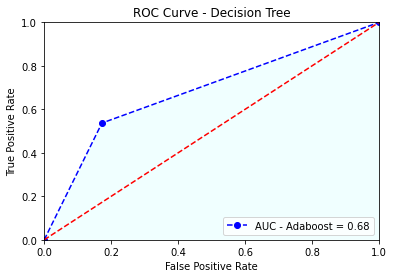

In [105]:
plt.title('ROC Curve - Decision Tree')
plt.plot(fpr_dtc_smo, tpr_dtc_smo, 'b--o', label='AUC - Adaboost = {}'.format(round(auc_dtc,2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_dtc_smo, tpr_dtc_smo, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

## Threshold

In [153]:
thres_abc = pd.DataFrame({'thres': threshold_abc_ros, 'tpr': tpr_abc_ros, 'fpr': fpr_abc_ros})
thres_abc[(thres_abc['tpr'] >0.8) & (thres_abc['tpr'] < 0.9)].sort_values('tpr', ascending = False).head(20)

,thres,tpr,fpr
455,0.495443,0.898219,0.453018
454,0.495453,0.898219,0.452396
453,0.495453,0.898219,0.451151
452,0.495459,0.898219,0.450529
451,0.495461,0.898219,0.449284
450,0.495468,0.898219,0.448662
449,0.495481,0.898219,0.444928
448,0.495490,0.898219,0.443062
444,0.495533,0.895674,0.439328
440,0.495617,0.895674,0.433105


In [154]:
abc_pred_49 = [0 if x < 0.495443 else 1 for x in adbprob1]
abc_pred_49

[0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,


In [155]:
print(classification_report(y_test, abc_ros_pred))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      1607
           1       0.47      0.79      0.59       393

    accuracy                           0.79      2000
   macro avg       0.71      0.79      0.72      2000
weighted avg       0.85      0.79      0.80      2000



In [156]:
print(classification_report(y_test, abc_pred_49))

              precision    recall  f1-score   support

           0       0.96      0.55      0.70      1607
           1       0.33      0.90      0.48       393

    accuracy                           0.62      2000
   macro avg       0.64      0.72      0.59      2000
weighted avg       0.83      0.62      0.65      2000



In [176]:
# menjadi file binary di export ke dashboard
import joblib
joblib.dump(abc_ros, "model")

['model']